# _Loan Project - Clustering_
**_Importing The Required Libraries & Packages_**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.preprocessing import StandardScaler
import pyodbc
import pickle
import warnings
warnings.filterwarnings('ignore')

**_Changing The Default Working Directory Path_**

In [2]:
os.chdir('C:\\Users\\chand\\OneDrive\\Desktop\\Loan Projects Clustering\\')

## _Data Reading_

**_Processed the input data using Structured Query Language (SQL) and done some cleaning,with the help of<span style='color:blue'> pyodbc </span> package connecting Jupyter Notebook with sql server in the following 3 cells._**

In [3]:
server = 'BALA\SQLEXPRESS'
db = 'Projects'

In [4]:
conn = pyodbc.connect ('DRIVER= {SQL Server}; SERVER='+server+';DATABASE='+db+ ';UID=bala sql;PWD=bala2252bala; Trusted connection=YES')

In [5]:
sql = 'select * from acc_ord_card_disp_client_dist aocdcd join loan_trans lt on lt.account_id= aocdcd.disposition_account_id'

**_Reading The SQL File Using Pandas Command_**

In [6]:
df = pd.read_sql(sql,conn)

**_Exporting the data after processing in SQL, the final data is converted to comma seperated file(csv)._**

In [7]:
df.to_csv('Loan_Final_Data.csv',index=False)

## _Exploratory Data Analysis_
**_Checking the Null values of all the Columns in the dataset_**

In [8]:
df.isnull().sum()

card_id                     0
disp_id                     0
type                        0
issued                      0
disposition_account_id      0
disposition_client_id       0
disposition_type            0
client_id                   0
birth_number                0
district_id                 0
A1                          0
A2                          0
A3                          0
A4                          0
A5                          0
A6                          0
A7                          0
A8                          0
A9                          0
A10                         0
A11                         0
A12                         0
A13                         0
A14                         0
A15                         0
A16                         0
order_id                    0
bank_to                     0
account_to                  0
amount                      0
k_symbol                    0
account_date                0
account_district_id         0
account_fr

**_Getting to describe the numerical columns of the dataset_**

In [9]:
df.describe()

,card_id,disp_id,disposition_account_id,disposition_client_id,client_id,birth_number,district_id,A1,A4,A5,...,account_district_id,trans_id,account_id,amount,balance,account,loan_id,loan_amount,loan_duration,loan_payments
count,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,8.680000e+02,868.000000,...,868.000000,8.680000e+02,868.000000,868.000000,868.000000,2.050000e+02,868.000000,868.000000,868.000000,868.000000
mean,907.690092,8139.987327,6767.154378,8265.955069,8265.955069,685696.934332,37.332949,37.332949,1.407953e+05,41.294931,...,39.427419,2.276811e+06,6767.154378,13533.202650,51020.558765,3.346704e+07,6374.570276,124083.428571,27.069124,4954.557604
std,238.683175,3244.507382,2715.120458,3376.937067,3376.937067,149850.689100,23.864496,23.864496,1.281183e+05,23.132398,...,25.833877,9.593156e+05,2715.120458,15346.995182,28746.846180,3.115044e+07,561.596458,74014.846356,16.620600,2019.525078
min,159.000000,946.000000,790.000000,946.000000,946.000000,351003.000000,1.000000,1.000000,5.131300e+04,0.000000,...,1.000000,2.320620e+05,790.000000,5.400000,200.000000,0.000000e+00,5126.000000,14628.000000,12.000000,1177.000000
25%,844.000000,6567.000000,5442.000000,6567.000000,6567.000000,570929.000000,14.000000,14.000000,8.651300e+04,21.000000,...,12.000000,1.602809e+06,5442.000000,306.224991,31045.900391,7.772154e+06,6112.000000,78939.000000,12.000000,3222.000000
50%,857.000000,6789.000000,5622.000000,6789.000000,6789.000000,780907.000000,32.000000,32.000000,1.050580e+05,34.000000,...,45.000000,1.852832e+06,5622.000000,7000.000000,47310.150391,2.417564e+07,6150.000000,105804.000000,24.000000,4579.000000
75%,1100.000000,11101.000000,9265.000000,11409.000000,11409.000000,790326.000000,57.000000,57.000000,1.619540e+05,65.000000,...,62.000000,3.314625e+06,9265.000000,22933.750000,67505.726562,6.987126e+07,6888.000000,174744.000000,36.000000,6918.000000
max,1223.000000,13231.000000,11013.000000,13539.000000,13539.000000,805502.000000,74.000000,74.000000,1.204953e+06,98.000000,...,74.000000,3.675971e+06,11013.000000,63366.000000,143605.703125,9.867897e+07,7240.000000,331560.000000,60.000000,7281.000000


**_Getting the information such as counts,datatypes of all the columns in the dataset_**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868 entries, 0 to 867
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   card_id                 868 non-null    int64  
 1   disp_id                 868 non-null    int64  
 2   type                    868 non-null    object 
 3   issued                  868 non-null    object 
 4   disposition_account_id  868 non-null    int64  
 5   disposition_client_id   868 non-null    int64  
 6   disposition_type        868 non-null    object 
 7   client_id               868 non-null    int64  
 8   birth_number            868 non-null    int64  
 9   district_id             868 non-null    int64  
 10  A1                      868 non-null    int64  
 11  A2                      868 non-null    object 
 12  A3                      868 non-null    object 
 13  A4                      868 non-null    int64  
 14  A5                      868 non-null    in

**_Finding the shape of the dataset_**

In [11]:
df.shape

(868, 50)

**_Since it has many columns,to extract the columns we need getting all the column names. so that we can identify the necessary columns_**

In [12]:
df.columns

Index(['card_id', 'disp_id', 'type', 'issued', 'disposition_account_id',
       'disposition_client_id', 'disposition_type', 'client_id',
       'birth_number', 'district_id', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7',
       'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'order_id',
       'bank_to', 'account_to', 'amount', 'k_symbol', 'account_date',
       'account_district_id', 'account_frequency', 'trans_id', 'account_id',
       'date', 'type', 'operation', 'amount', 'balance', 'k_symbol', 'bank',
       'account', 'loan_id', 'loan_date', 'loan_amount', 'loan_duration',
       'loan_payments', 'loan_status'],
      dtype='object')

**_Assigning the independent variable with only two column i.e. `Loan Amount`, `Balance` since it a Clustering Model there is no dependent variable_**

In [13]:
x = df[['loan_amount','balance']]

## _Data Preprocessing:_
**_Standardizing the independent variable of the dataset_**

In [14]:
sc_x = StandardScaler()
sc_x = sc_x.fit_transform(x)

**_Finding the WCSS(Within Cluster Sum of Squares) values using KMeans Clustering_**

In [15]:
wcss = []
for i in range(2,15):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(sc_x)
    wcss.append(kmeans.inertia_)
display(wcss)

[1073.9739233731987,
 674.5737357540261,
 505.20352023741293,
 393.25162654069777,
 303.49754991606807,
 264.97488790287235,
 228.80115244320012,
 198.3483522451043,
 172.80417342375716,
 145.25540880144308,
 132.7092424186626,
 118.48618165214506,
 105.28250876944163]

**_Plotting the Line Graph with WCSS Values to get the exact ideal number of clusters to be created using KMeans Clustering Algorithm and saving the PNG file_**

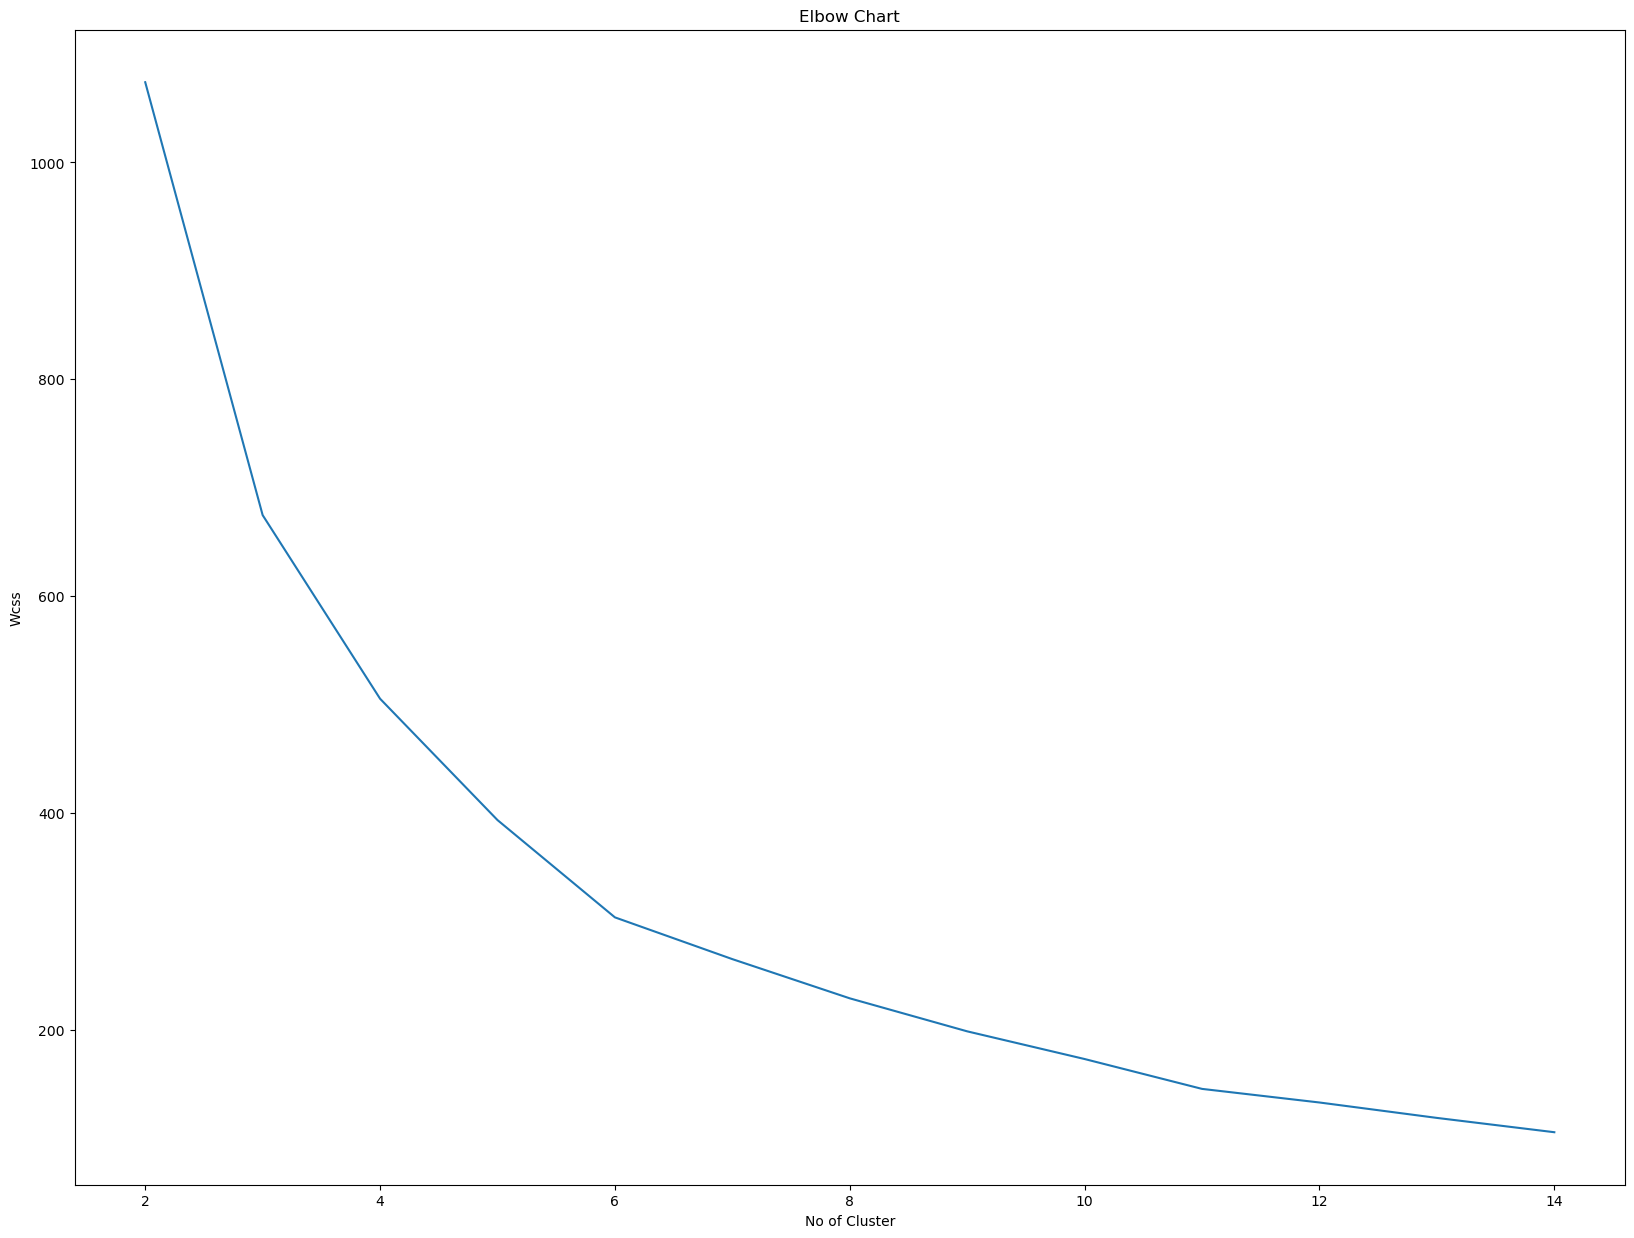

In [16]:
plt.rcParams['figure.figsize']=(20,15)
plt.plot(range(2,15),wcss)
plt.title('Elbow Chart')
plt.savefig('Elbow Chart.png')
plt.xlabel('No of Cluster')
plt.ylabel('Wcss')
plt.show()

**_Fitting the KMeans Clustering model with ideal number of clusters found from Elbow Method Graph and getting the dataset belonging to the cluster_**

In [17]:
kmeans = KMeans(n_clusters=6,init='k-means++')
kmeans.fit(sc_x)
y_kmeans = kmeans.labels_

**_Plotting the Scatter Plot Graph with the independent variable and the Cluster which it belongs and saving the PNG file_**

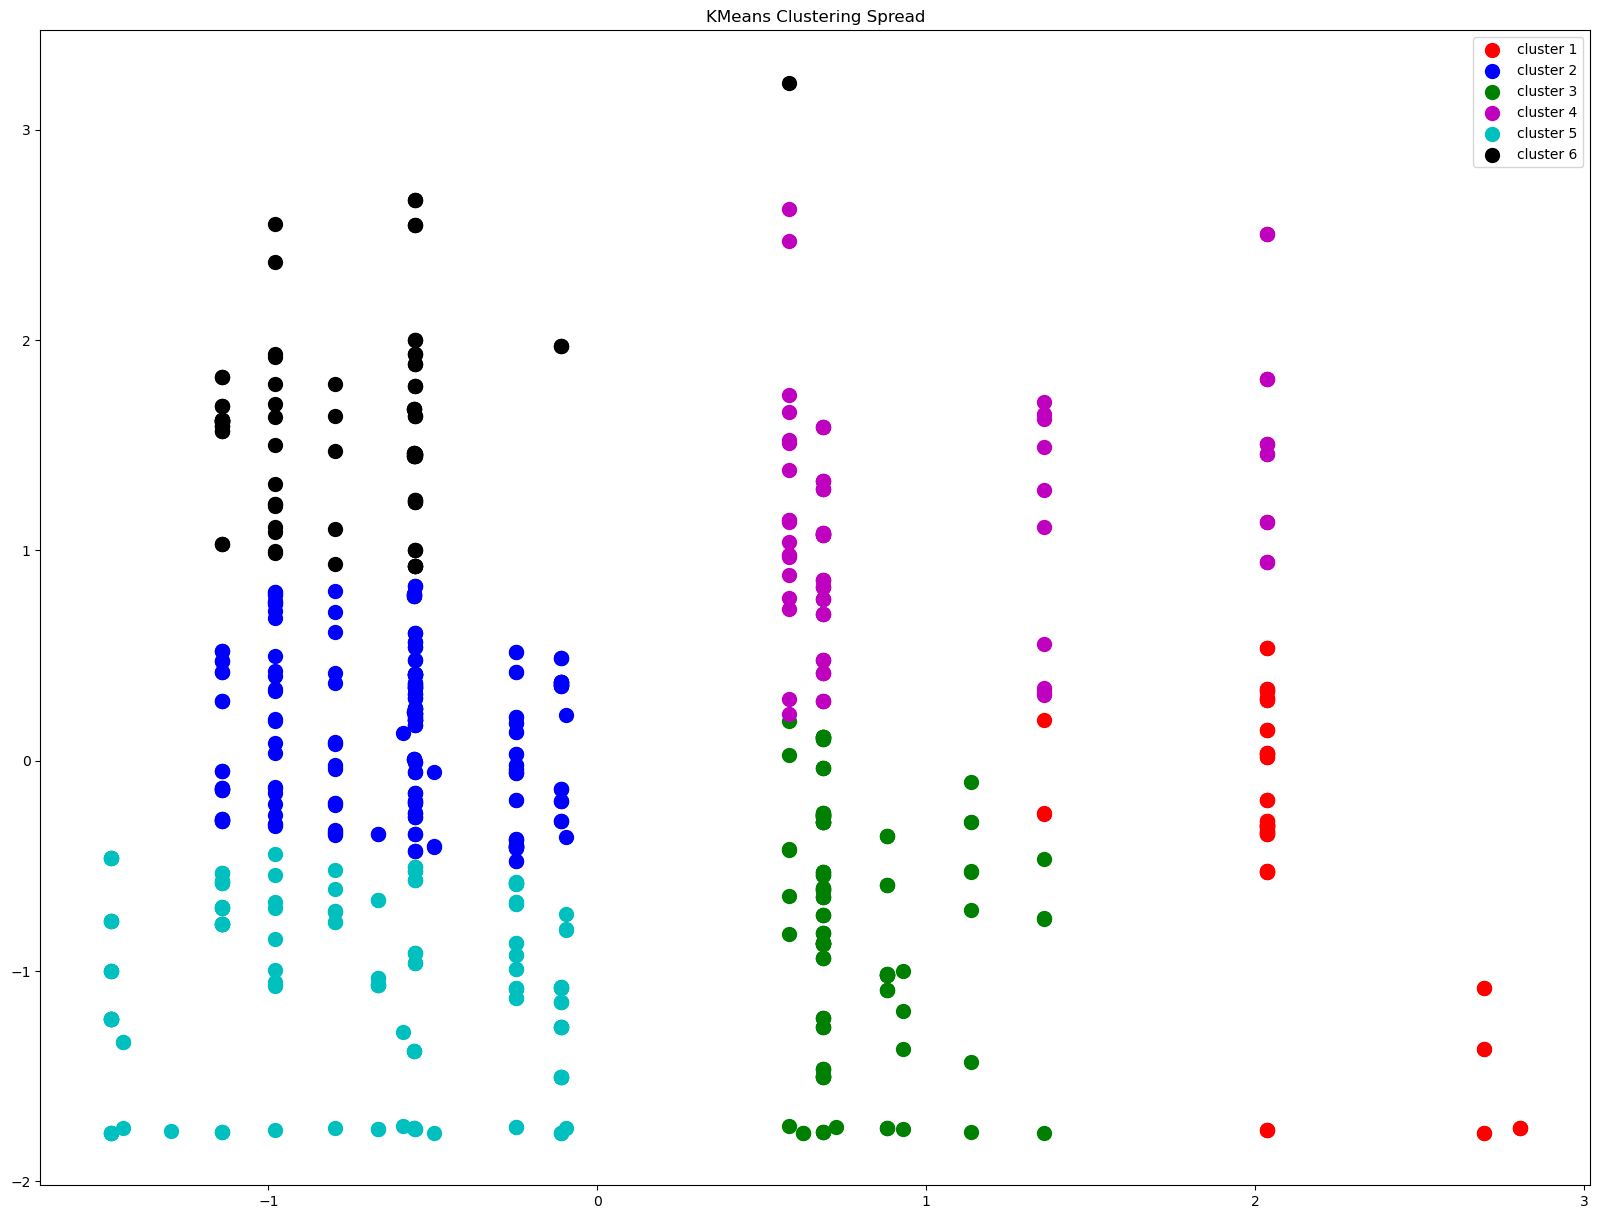

In [18]:
plt.scatter(sc_x[y_kmeans==0,0],sc_x[y_kmeans==0,1],s=100,c='r',label='cluster 1')
plt.scatter(sc_x[y_kmeans==1,0],sc_x[y_kmeans==1,1],s=100,c='b',label='cluster 2')
plt.scatter(sc_x[y_kmeans==2,0],sc_x[y_kmeans==2,1],s=100,c='g',label='cluster 3')
plt.scatter(sc_x[y_kmeans==3,0],sc_x[y_kmeans==3,1],s=100,c='m',label='cluster 4')
plt.scatter(sc_x[y_kmeans==4,0],sc_x[y_kmeans==4,1],s=100,c='c',label='cluster 5')
plt.scatter(sc_x[y_kmeans==5,0],sc_x[y_kmeans==5,1],s=100,c='k',label='cluster 6')
plt.legend()
plt.title('KMeans Clustering Spread')
plt.savefig('KMeans Clustering Spread Graph.png')
plt.show()

**_Merging the Cluster Number , adding the seperate column for it,also getting the `account_id` column from the  dataset with assigned independent variable and adding new columns names for the existing columns of the resultant dataset such as `Account ID` , `Loan Amount` , `Balance` , `Cluster Number`. displaying the resulting dataset_**

In [19]:
result = pd.concat([df.iloc[:,4],x,pd.DataFrame(y_kmeans)],axis=1)
result.columns = ['Account ID','Loan Amount','Balance','Cluster Number']
result

,Account ID,Loan Amount,Balance,Cluster Number
0,790,208128,30674.599609,2
1,790,208128,300.000000,2
2,790,208128,9900.000000,2
3,790,208128,42599.000000,2
4,790,208128,42658.199219,2
...,...,...,...,...
863,11013,274740,42844.000000,0
864,11013,274740,35844.000000,0
865,11013,274740,35921.101562,0
866,11013,274740,78165.101562,3


**_From the resulting dataset ,Found that the the `Balance` column is currency value but the readability is much worse since it has many figures after the decimal point. so , rounding off the `Balance` column and updating the rounded value to the `Balance` column in the independent variable and displaying the independent variable after updating_**

In [20]:
rounded_balance = round(x['balance'],2)
x.update({'balance':rounded_balance})
display(x)

,loan_amount,balance
0,208128,30674.6
1,208128,300.0
2,208128,9900.0
3,208128,42599.0
4,208128,42658.2
...,...,...
863,274740,42844.0
864,274740,35844.0
865,274740,35921.1
866,274740,78165.1


**_Now again merging the columns just as like before , with updated columns name as `Account ID` , `Loan Amount` , `Balance` , `Cluster Number`  since  we updated the independent variable the readability of all columns is pretty good_**

In [21]:
result = pd.concat([df.iloc[:,4],x,pd.DataFrame(y_kmeans)],axis=1)
result.columns = ['Account ID','Loan Amount($)','Balance($)','Cluster Number']
result

,Account ID,Loan Amount($),Balance($),Cluster Number
0,790,208128,30674.6,2
1,790,208128,300.0,2
2,790,208128,9900.0,2
3,790,208128,42599.0,2
4,790,208128,42658.2,2
...,...,...,...,...
863,11013,274740,42844.0,0
864,11013,274740,35844.0,0
865,11013,274740,35921.1,0
866,11013,274740,78165.1,3


**_grouping by the Cluster Number with respect to `Loan Amount` and `Balance` to get the Minimum and Maximum value of `Loan Amount` , `Balance` and the number of values in each clusters._**

In [22]:
result.groupby('Cluster Number').agg({'Loan Amount($)':[np.min,np.max],'Balance($)':[np.min,np.max,np.size]})

Loan Amount($)         Balance($)               
                         amin    amax       amin      amax size
Cluster Number                                                 
0                      224604  331560      200.0   66391.9   72
1                       39576  117024    37262.7   74831.8  261
2                      167100  224604      200.0   56384.1  155
3                      167100  274740    57437.4  126386.4  100
4                       14628  117024      200.0   38231.6  171
5                       39576  167100    77560.3  143605.7  109

**_Loading the pickle file with K-Means Clustering Model_**

In [23]:
pickle.dump(kmeans,open('KMeans.pkl','wb'))